# 백준 2250문제(https://www.acmicpc.net/problem/2250)

이진트리를 다음의 규칙에 따라 행과 열에 번호가 붙어있는 격자 모양의 틀 속에 그리려고 한다. 이때 다음의 규칙에 따라 그리려고 한다.
1. 이진트리에서 같은 레벨(level)에 있는 노드는 같은 행에 위치한다.
2. 한 열에는 한 노드만 존재한다.
3. 임의의 노드의 왼쪽 부트리(left subtree)에 있는 노드들은 해당 노드보다 왼쪽의 열에 위치하고, 오른쪽 부트리(right subtree)에 있는 노드들은 해당 노드보다 오른쪽의 열에 위치한다.
4. 노드가 배치된 가장 왼쪽 열과 오른쪽 열 사이엔 아무 노드도 없이 비어있는 열은 없다.
이와 같은 규칙에 따라 이진트리를 그릴 때 각 레벨의 너비는 그 레벨에 할당된 노드 중 가장 오른쪽에 위치한 노드의 열 번호에서 가장 왼쪽에 위치한 노드의 열 번호를 뺀 값 더하기 1로 정의한다. 트리의 레벨은 가장 위쪽에 있는 루트 노드가 1이고 아래로 1씩 증가한다.

아래 그림은 어떤 이진트리를 위의 규칙에 따라 그려 본 것이다. 첫 번째 레벨의 너비는 1, 두 번째 레벨의 너비는 13, 3번째, 4번째 레벨의 너비는 각각 18이고, 5번째 레벨의 너비는 13이며, 그리고 6번째 레벨의 너비는 12이다.

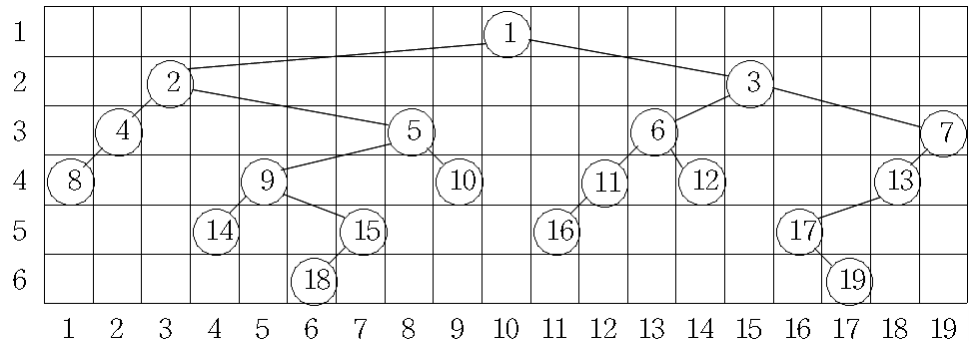

In [1]:
from IPython.display import Image
Image('C:\\Users\\user\\Desktop\\다운로드.png')

우리는 주어진 이진트리를 위의 규칙에 따라 그릴 때에 너비가 가장 넓은 레벨과 그 레벨의 너비를 계산하려고 한다. 위의 그림의 예에서 너비가 가장 넓은 레벨은 3번째와 4번째로 그 너비는 18이다. 너비가 가장 넓은 레벨이 두 개 이상 있을 때는 번호가 작은 레벨을 답으로 한다. 그러므로 이 예에 대한 답은 레벨은 3이고, 너비는 18이다.

임의의 이진트리가 입력으로 주어질 때 너비가 가장 넓은 레벨과 그 레벨의 너비를 출력하는 프로그램을 작성하시오

> 첫째줄 입력: 첫째 줄에 노드의 개수를 나타내는 정수 N(1 ≤ N ≤ 10,000)이 주어진다. 다음 N개의 줄에는 각 줄마다 노드 번호와 해당 노드의 왼쪽 자식 노드와 오른쪽 자식 노드의 번호가 순서대로 주어진다. 노드들의 번호는 1부터 N까지이며, 자식이 없는 경우에는 자식 노드의 번호에 -1이 주어진다.

> 출력: 첫째 줄에 너비가 가장 넓은 레벨과 그 레벨의 너비를 순서대로 출력한다. 너비가 가장 넓은 레벨이 두 개 이상 있을 때에는 번호가 작은 레벨을 출력한다.

## 1. Python solution1

In [3]:
class Node:
    def __init__(self, number, left_node, right_node):
        self.parent = -1
        self.number = number
        self.left_node = left_node
        self.right_node = right_node

# 중위 순회
def in_order(node, level):
    global level_depth, x
    level_depth = max(level_depth, level)
    if node.left_node != -1:
        in_order(tree[node.left_node], level + 1)
    level_min[level] = min(level_min[level], x)
    level_max[level] = max(level_max[level], x)
    x += 1
    if node.right_node != -1:
        in_order(tree[node.right_node], level + 1)

n = int(input())
tree = {}
level_min = [n]
level_max = [0]
root = -1
x = 1
level_depth = 1

for i in range(1, n + 1):
    tree[i] = Node(i, -1, -1)
    level_min.append(n)
    level_max.append(0)

for _ in range(n):
    number, left_node, right_node = map(int, input().split())
    tree[number].left_node = left_node
    tree[number].right_node = right_node
    if left_node != -1:
        tree[left_node].parent = number
    if right_node != -1:
        tree[right_node].parent = number

for i in range(1, n + 1):
    if tree[i].parent == -1:
        root = i

in_order(tree[root], 1)
result_level = 1
result_width = level_max[1] - level_min[1] + 1
for i in range(2, level_depth + 1):
    width = level_max[i] - level_min[i] + 1
    if result_width < width:
        result_level = i
        result_width = width

print(result_level, result_width)

19
1 2 3
2 4 5
3 6 7
4 8 -1
5 9 10
6 11 12
7 13 -1
8 -1 -1
9 14 15
10 -1 -1
11 16 -1
12 -1 -1
13 17 -1
14 -1 -1
15 18 -1
16 -1 -1
17 -1 19
18 -1 -1
19 -1 -1
3 18
